# Filter analysis

In [5]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt


In [23]:

def load_bmp_images_to_stack(folder_path):
    # List all files in the directory and filter out those that are BMP files
    bmp_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.bmp')])
    print(bmp_files)
    # Initialize an empty list to hold the image arrays
    images = []
    
    # Loop through the BMP files, open each image, convert it to an array, and append it to the list
    for file in bmp_files:
        image_path = os.path.join(folder_path, file)
        image = Image.open(image_path)
        images.append(np.array(image))
        
    # Stack the image arrays into a single NumPy array
    # The resulting shape will be (N, H, W, C) where:
    # N is the number of images, H is the height, W is the width, and C is the number of channels
    # For grayscale images, you might need to reshape or adjust the stacking to fit your needs
    image_stack = np.stack(images)
    
    return image_stack

# Replace 'your_folder_path' with the path to the folder containing the BMP files
folder_path = '../Calibration_Data/calibration_matrix_11_10_2023_2_navg8_gain0_exp3.33ms_378-890'
image_stack = load_bmp_images_to_stack(folder_path)

print("Shape of the stacked array:", image_stack.shape)


['378.bmp', '380.bmp', '382.bmp', '384.bmp', '386.bmp', '388.bmp', '390.bmp', '392.bmp', '394.bmp', '396.bmp', '398.bmp', '400.bmp', '402.bmp', '404.bmp', '406.bmp', '408.bmp', '410.bmp', '412.bmp', '414.bmp', '416.bmp', '418.bmp', '420.bmp', '422.bmp', '424.bmp', '426.bmp', '428.bmp', '430.bmp', '432.bmp', '434.bmp', '436.bmp', '438.bmp', '440.bmp', '442.bmp', '444.bmp', '446.bmp', '448.bmp', '450.bmp', '452.bmp', '454.bmp', '456.bmp', '458.bmp', '460.bmp', '462.bmp', '464.bmp', '466.bmp', '468.bmp', '470.bmp', '472.bmp', '474.bmp', '476.bmp', '478.bmp', '480.bmp', '482.bmp', '484.bmp', '486.bmp', '488.bmp', '490.bmp', '492.bmp', '494.bmp', '496.bmp', '498.bmp', '500.bmp', '502.bmp', '504.bmp', '506.bmp', '508.bmp', '510.bmp', '512.bmp', '514.bmp', '516.bmp', '518.bmp', '520.bmp', '522.bmp', '524.bmp', '526.bmp', '528.bmp', '530.bmp', '532.bmp', '534.bmp', '536.bmp', '538.bmp', '540.bmp', '542.bmp', '544.bmp', '546.bmp', '548.bmp', '550.bmp', '552.bmp', '554.bmp', '556.bmp', '558.bmp'

<Figure size 640x480 with 0 Axes>

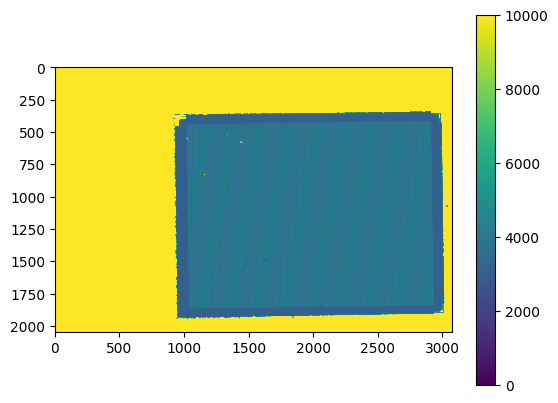

<Figure size 640x480 with 0 Axes>

In [24]:
msum = image_stack.sum(axis=0)  # sum all images
plt.imshow(msum)
plt.colorbar()
plt.clim([0,10e3])
plt.figure()


Text(0, 0.5, 'Intensity')

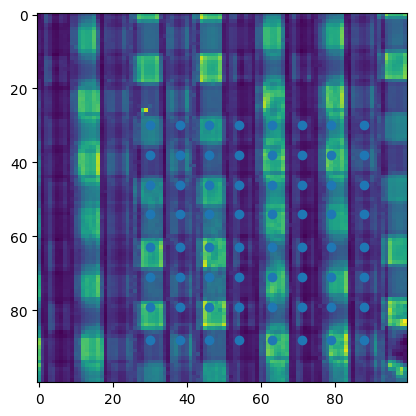

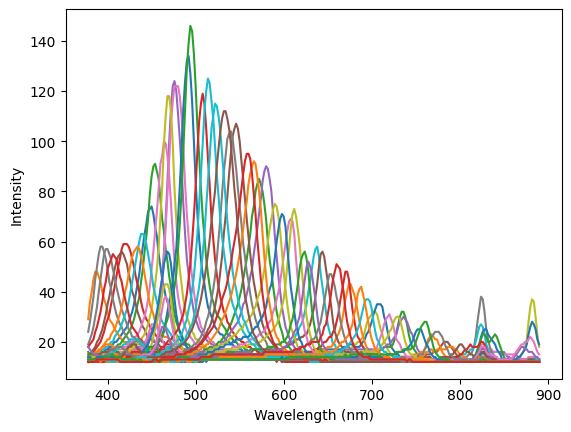

In [44]:
# iterate through the filters and plot the transmission

# take a sumpart of the matrix so it's easier to plot. 
superpixel= image_stack[:,1000:1100,2000:2100]
plt.figure()
plt.imshow(superpixel.sum(axis=0))

idy_start, idx_start = [30,30]  #starting pixel
pixstep = 8.3
superpixelsize = 8

idy = np.floor(np.arange(idy_start, idy_start+pixstep*superpixelsize, pixstep)).astype(int)
idx = np.floor(np.arange(idx_start, idx_start+pixstep*superpixelsize, pixstep)).astype(int)

X, Y = np.meshgrid(idx, idy)


transmission_curves =(superpixel[:,X,Y])
tcurves = transmission_curves.reshape(257,64)

plt.scatter(X, Y)
plt.figure()
wv = np.arange(378,891,2)
plt.plot(wv,tcurves)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')

In [48]:
np.min(tcurves, axis=0)

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 13, 12, 13, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], dtype=uint8)